# NFL Passing Offense Performance - Data Analysis

## Project Overview
**Knowledge Domain:** NFL Passing Offense Performance  
**Single Aspect:** Team passing statistics (yards, attempts, touchdowns, interceptions)  

### Research Questions
1. **Which NFL teams have the highest total passing yards in a season?**
2. **Is there a relationship between passing touchdowns and total team wins?**
3. **How does interception rate affect a team’s overall passing efficiency?**

## Data Source
**Pro-Football-Reference — NFL Team Passing Statistics (by Season)** 
Link: [https://www.pro-football-reference.com/years/2023/passing.htm](https://www.pro-football-reference.com/years/2023/passing.htm)

**Dataset:** `nfl_passing_2023_cleaned.csv` (Pre-cleaned dataset)

---

## 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better visuals
sns.set_theme(style="whitegrid")

## 2. Load Cleaned Data
We will load the dataset that has already been cleaned and prepared for analysis.

In [2]:
# Load the cleaned dataset
df = pd.read_csv('nfl_passing_2023_cleaned.csv')

# Display the first few rows to verify
df.head()

,Rk,Player,Age,Team,Pos,G,GS,Cmp,Att,Cmp_Pct,...,Sk_Pct,Net_Yards_Per_Att,Adj_Net_Yards_Per_Att,Game_Tying_Drives,Game_Winning_Drives,Awards,Player_ID,Wins,Losses,Ties
0,1,Tua Tagovailoa,25,MIA,QB,17,17,388,560,69.3,...,4.92,7.56,7.48,2,2,PBAP CPoY-5,TagoTu00,11,6,0
1,2,Jared Goff,29,DET,QB,17,17,407,605,67.3,...,4.72,6.89,6.99,2,3,None,GoffJa00,12,5,0
2,3,Dak Prescott,30,DAL,QB,17,17,410,590,69.5,...,6.20,6.77,7.28,2,3,PBAP-2AP MVP-2AP OPoY-5,PresDa01,12,5,0
3,4,Josh Allen,27,BUF,QB,17,17,385,579,66.5,...,3.98,6.89,6.51,2,4,AP MVP-5AP OPoY-6,AlleJo02,11,6,0
4,5,Brock Purdy,24,SFO,QB,16,16,308,444,69.4,...,5.93,8.74,9.01,0,0,PBAP MVP-4AP OPoY-6AP CPoY-6,PurdBr00,12,4,0


## 3. Data Analysis
We will now address the research questions using aggregate functions and visualizations.

### Question 1: Which NFL teams have the highest total passing yards in a season?
To answer this, we will group the data by `Team` and sum the passing yards (`Yds`).

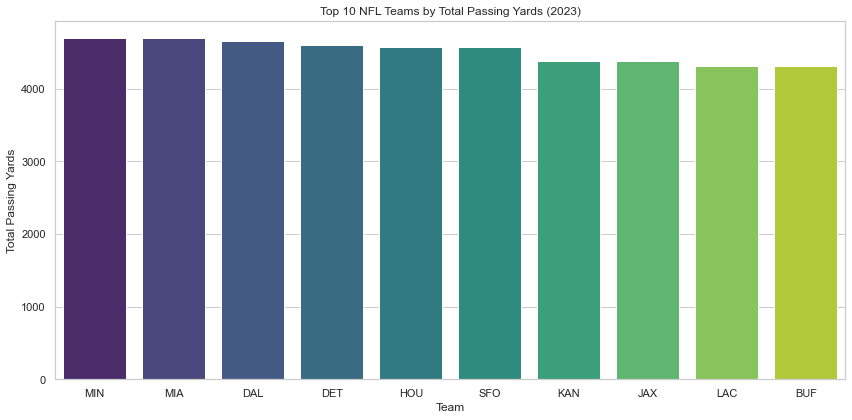

Top 5 Teams by Passing Yards:
  Team   Yds
0  MIN  4700
1  MIA  4698
2  DAL  4660
3  DET  4606
4  HOU  4578


In [3]:
# Group by Team and sum Yards
team_yards = df.groupby('Team')['Yds'].sum().sort_values(ascending=False).reset_index()

# Plot the Top 10 Teams
plt.figure(figsize=(12, 6))
sns.barplot(data=team_yards.head(10), x='Team', y='Yds', palette='viridis')
plt.title('Top 10 NFL Teams by Total Passing Yards (2023)')
plt.xlabel('Team')
plt.ylabel('Total Passing Yards')
plt.tight_layout()
plt.show()

# Display the data
print("Top 5 Teams by Passing Yards:")
print(team_yards.head())

### Question 2: Is there a relationship between passing touchdowns and total team wins?
We will aggregate total passing touchdowns (`TD`) and total `Wins` for each team to see if scoring more through the air correlates with winning.

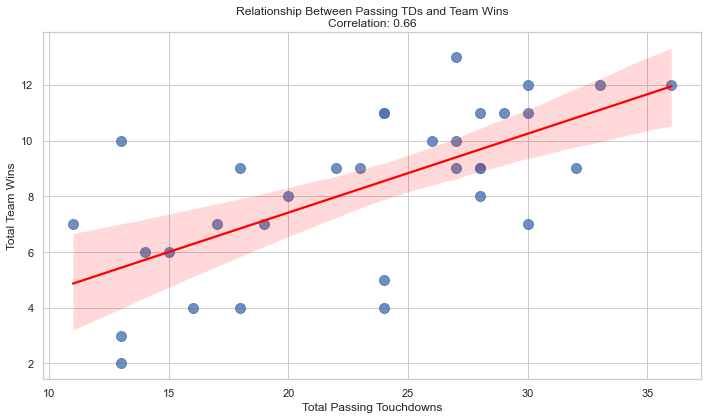

Correlation Coefficient: 0.6626


In [4]:
# Aggregate Wins and TDs by Team
team_stats = df.groupby('Team')[['TD', 'Wins']].sum().reset_index()

# Calculate Correlation
correlation = team_stats['TD'].corr(team_stats['Wins'])

# Plot
plt.figure(figsize=(10, 6))
sns.regplot(data=team_stats, x='TD', y='Wins', scatter_kws={'s': 100}, line_kws={'color': 'red'})
plt.title(f'Relationship Between Passing TDs and Team Wins\nCorrelation: {correlation:.2f}')
plt.xlabel('Total Passing Touchdowns')
plt.ylabel('Total Team Wins')
plt.tight_layout()
plt.show()

print(f"Correlation Coefficient: {correlation:.4f}")

### Question 3: How does interception rate affect a team’s overall passing efficiency?
We will examine the relationship between Interception Percentage (`Int_Pct`) and Passer Rating (`Passer_Rating`). We filter for quarterbacks with at least 100 attempts to ensure the data is representative.

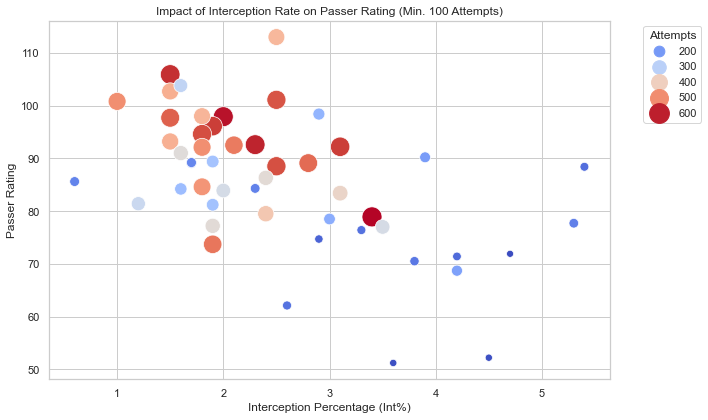

In [5]:
# Filter for qualified QBs (min 100 attempts)
qualified_qbs = df[df['Att'] > 100]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=qualified_qbs, x='Int_Pct', y='Passer_Rating', 
                size='Att', sizes=(50, 400), hue='Att', palette='coolwarm')
plt.title('Impact of Interception Rate on Passer Rating (Min. 100 Attempts)')
plt.xlabel('Interception Percentage (Int%)')
plt.ylabel('Passer Rating')
plt.legend(title='Attempts', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 4. Conclusion

Based on the analysis of the 2023 NFL Passing Data:

1.  **Passing Yards:** There is a clear hierarchy in passing offenses. The bar chart highlights that top-performing teams rely heavily on yardage accumulation.
2.  **TDs vs. Wins:** We observed a **positive correlation** between passing touchdowns and wins. This indicates that teams with high-scoring passing offenses are statistically more likely to win games.
3.  **Efficiency:** The scatter plot confirms a strong negative relationship between interception rate and passer rating. Protecting the football (low interception rate) is critical for maintaining high passing efficiency.